In [2]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


In [3]:
# Models and Utils
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [4]:
# warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Loading Train images and labels
(X_train , y_train ) , (X_test , y_test )   = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


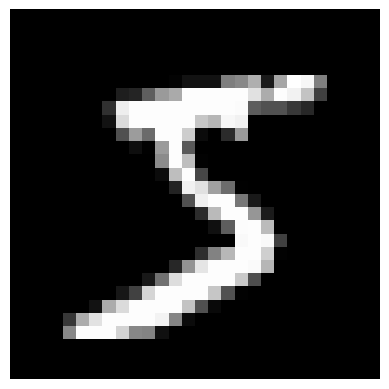

In [6]:
image_array = X_train[0]  # shape: (28, 28)

# Convert NumPy array to PIL Image
image = Image.fromarray(image_array.astype(np.uint8))

# Show the image

plt.imshow(image, cmap='gray' )
plt.axis('off')
plt.show()

In [7]:
print("X Train"  , X_train.shape)
print("X Test" , X_test.shape)
print("Y Train" , y_train.shape)
print("Y Test" , y_test.shape)

X Train (60000, 28, 28)
X Test (10000, 28, 28)
Y Train (60000,)
Y Test (10000,)


In [8]:
# Reshapping
# Suitable as 784 input for the model
X_train = X_train.reshape(-1 ,28*28)
X_test = X_test.reshape(-1 ,28*28)

In [9]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
# MLPClassifier
mlp_model = MLPClassifier(activation = "relu" ,
                          solver = "adam" ,
                          hidden_layer_sizes=(128 , 64))

In [13]:
mlp_model.fit(X_train , y_train)

MLPClassifier(hidden_layer_sizes=(128, 64))

In [14]:
y_pred = mlp_model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
# Accuracy
print("Accuracy Score : " , metrics.accuracy_score(y_test , y_pred))

Accuracy Score :  0.9798


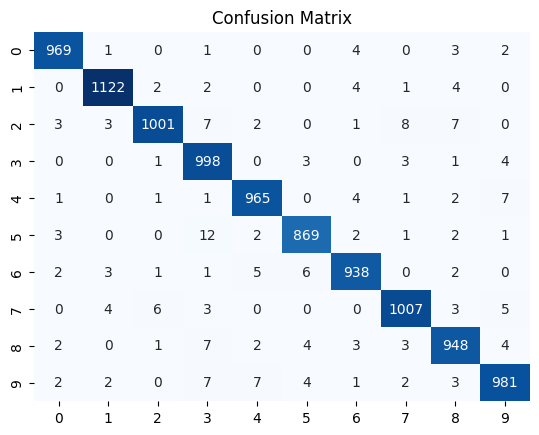

In [16]:
# Confusion metrics
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(cnf_matrix , cbar = False   , fmt = "d"  , annot = True , cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

## Tensorflow NN

In [17]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu' , input_shape = (784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10 , activation = "softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) ,
              loss = tf.keras.losses.sparse_categorical_crossentropy ,
              metrics = ["accuracy"])

In [19]:
# Evaluation Before Training
model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1020 - loss: 2.2883


[2.2887141704559326, 0.10029999911785126]

In [20]:
history = model.fit(X_train , y_train , epochs = 10 ,batch_size = 64 , validation_split = 0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7783 - loss: 0.7149 - val_accuracy: 0.9523 - val_loss: 0.1645
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9379 - loss: 0.2080 - val_accuracy: 0.9652 - val_loss: 0.1203
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9575 - loss: 0.1462 - val_accuracy: 0.9688 - val_loss: 0.1036
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9622 - loss: 0.1237 - val_accuracy: 0.9695 - val_loss: 0.0998
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9686 - loss: 0.1011 - val_accuracy: 0.9728 - val_loss: 0.0933
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9725 - loss: 0.0878 - val_accuracy: 0.9722 - val_loss: 0.0930
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0792 - val_accuracy: 0.9754 - val_loss: 0.0859
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9768 - loss: 0.0718 - val_accuracy: 0.

In [21]:
val_loss , val_accuracy = model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0942


In [50]:
# Accuracy score
print("Accuracy : " , val_accuracy)
# Validation loss
print("Loss : ", val_loss)

Accuracy :  0.9782000184059143
Loss :  0.07908070087432861


In [51]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [52]:
y_pred.shape

(10000, 10)

In [53]:
y_pred = np.argmax(y_pred , axis = 1)

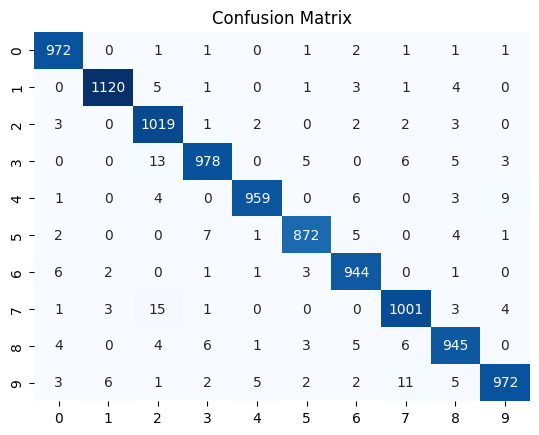

In [54]:
# Confusion metrics
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(cnf_matrix , cbar = False   , fmt = "d"  , annot = True , cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()